# Projet_SAE Ifig Le Gonidec & Mattéo Rouanne

### Lien GitHub : https://github.com/matiornn/projet_notebook/blob/main/Projet_SAE.ipynb

In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2202161\AppData\local\Temp\ipykernel_9180\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
%matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

C:\Users\e2202161\.conda\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 26.1MB/s]

Extracting model files...
Path to dataset files: C:\Users\e2202161\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [7]:
# Lire le fichier depuis le répertoire du projet
df = pd.read_csv(f"{path}\ds_salaries.csv")
print(df.head())  # Affiche les premières lignes du DataFrame

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\e2202161\AppData\local\Temp\ipykernel_9180\2556320857.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv(f"{path}\ds_salaries.csv")


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [12]:
# Données manquantes 
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

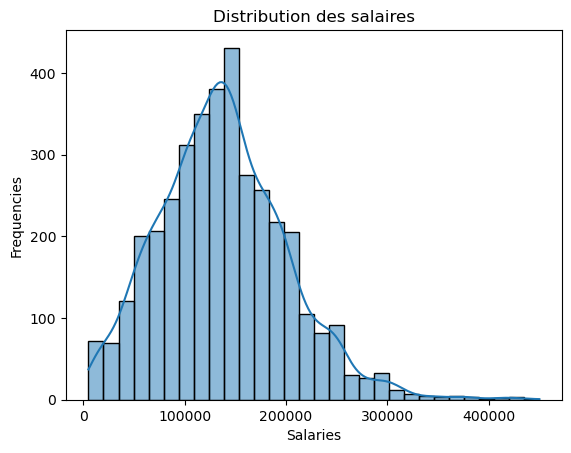

In [114]:
sns.histplot(df['salary_in_usd'],bins=30,kde='True')
plt.title("Distribution des salaires")
plt.xlabel("Salaries")
plt.ylabel("Frequencies")
plt.show()

In [52]:
print(np.unique(df['company_location']).tolist())

['AE', 'AL', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BO', 'BR', 'BS', 'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CZ', 'DE', 'DK', 'DZ', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JP', 'KE', 'LT', 'LU', 'LV', 'MA', 'MD', 'MK', 'MT', 'MX', 'MY', 'NG', 'NL', 'NZ', 'PH', 'PK', 'PL', 'PR', 'PT', 'RO', 'RU', 'SE', 'SG', 'SI', 'SK', 'TH', 'TR', 'UA', 'US', 'VN']


In [58]:
#Salaire moyen par rôle
print(df['salary_in_usd'].groupby(df['job_title']).mean().round(2))

# Salaire moyen par pays
print(df['salary_in_usd'].groupby(df['company_location']).mean().round(2))

# Salaires moyens par niveau d'expérience
print(df['salary_in_usd'].groupby(df['experience_level']).mean().round(2))

job_title
3D Computer Vision Researcher     21352.25
AI Developer                     136666.09
AI Programmer                     55000.00
AI Scientist                     110120.88
Analytics Engineer               152368.63
                                   ...    
Research Engineer                163108.38
Research Scientist               161214.20
Software Data Engineer            62510.00
Staff Data Analyst                15000.00
Staff Data Scientist             105000.00
Name: salary_in_usd, Length: 93, dtype: float64
company_location
AE    100000.00
AL     10000.00
AM     50000.00
AR     25000.00
AS     29351.00
        ...    
TH     23064.33
TR     19058.00
UA     57850.00
US    151822.01
VN     12000.00
Name: salary_in_usd, Length: 72, dtype: float64
experience_level
EN     78546.28
EX    194930.93
MI    104525.94
SE    153051.07
Name: salary_in_usd, dtype: float64


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [66]:
# Filtrer les salaires pour un pays donné (ex : US)
df_US = df[df.company_location == 'US']
print(df_US)

      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence 

In [87]:
# Top 5 des entreprises qui paient le plus
df.groupby('company_location')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(5)

company_location
IL    271446.50
PR    167500.00
US    151822.01
RU    140333.33
CA    131917.69
Name: salary_in_usd, dtype: float64

In [102]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000

# Je calcule mes moyennes puis je filtre
df_salaire_moyen_par_role = df['salary_in_usd'].groupby(df['job_title']).mean().round(2)
df_salaire_moyen_par_role[df_salaire_moyen_par_role > 100000]

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
df.groupby('company_location')['remote_ratio'].mean().round(2).sort_values(ascending=False)

company_location
EG    100.0
CF    100.0
MY    100.0
AR    100.0
NG    100.0
      ...  
HK      0.0
HN      0.0
LT      0.0
LV      0.0
VN      0.0
Name: remote_ratio, Length: 72, dtype: float64

In [104]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)

# On définit un nouveau dataset pour filtrer puis on fait notre moyenne
df_remote_100 = df[df['remote_ratio'] == 100]
print("Le Salaire moyen des employés à distance : ",df_remote_100['salary_in_usd'].mean().round(2),"$")

# Comparer salaires moyens pour deux catégories
# On définit un nouveau dataset pour filtrer puis on fait notre moyenne
df_Data_Analyst = df[df['job_title'] == "Data Analyst"]
print("Le Salaire moyen des Data Analyst : ",df_Data_Analyst['salary_in_usd'].mean().round(2),"$")

df_Data_Engineer = df[df['job_title'] == "Data Engineer"]
print("Le Salaire moyen des Data Engineer : ",df_Data_Engineer['salary_in_usd'].mean().round(2),"$")


Le Salaire moyen des employés à distance :  136481.45 $
Le Salaire moyen des Data Analyst :  108716.23 $
Le Salaire moyen des Data Engineer :  142785.73 $


In [107]:
# Ajouter une colonne pour les fourchettes de salaires

# Fonction pour définir les différentes fourchettes de salaire
def categorie_salaire(salary):
    if salary < 50000:
        return "<50k"
    elif 50000 <= salary < 100000:
        return "50k-100k"
    elif 100000 <= salary < 150000:
        return "100k-150k"
    else:
        return "150k+"

# On applique la fonction sur la colonne salary_in_usd
df['fourchette_salaire'] = df['salary_in_usd'].apply(categorie_salaire)

# On affiche le nouveau dataframe
print(df[['job_title', 'salary_in_usd', 'fourchette_salaire']])


                     job_title  salary_in_usd fourchette_salaire
0     Principal Data Scientist          85847           50k-100k
1                  ML Engineer          30000               <50k
2                  ML Engineer          25500               <50k
3               Data Scientist         175000              150k+
4               Data Scientist         120000          100k-150k
...                        ...            ...                ...
3750            Data Scientist         412000              150k+
3751  Principal Data Scientist         151000              150k+
3752            Data Scientist         105000          100k-150k
3753     Business Data Analyst         100000          100k-150k
3754      Data Science Manager          94665           50k-100k

[3755 rows x 3 columns]


In [110]:
# Analyse des corrélations
# Relation entre télétravail et salaire
print(df['remote_ratio'].corr(df['salary_in_usd']))
# Il y a donc très peu de lien entre le télétravail et le salaire !

-0.06417098519057557


In [108]:
# Salaire moyen par taille d'entreprise
print(df['salary_in_usd'].groupby(df['company_size']).mean().round(2))
# Comme quoi, les plus grandes entreprises ne sont pas celles qui payent forcément le mieux !

company_size
L    118300.98
M    143130.55
S     78226.68
Name: salary_in_usd, dtype: float64


In [112]:
# Tableau croisé des salaires avec en lignes le niveau d'expérience, en colonne la proportion de télétravail et en valeur la moyenne des salaires
# De plus, on remarque une corrélation entre le niveau d'expérience et le niveau de rémunération

pivot_table = df.pivot_table(
    index='experience_level',
    columns='remote_ratio',
    values='salary_in_usd',
    aggfunc='mean'
)

print("Tableau croisé des salaires :\n", pivot_table)

Tableau croisé des salaires :
 remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
